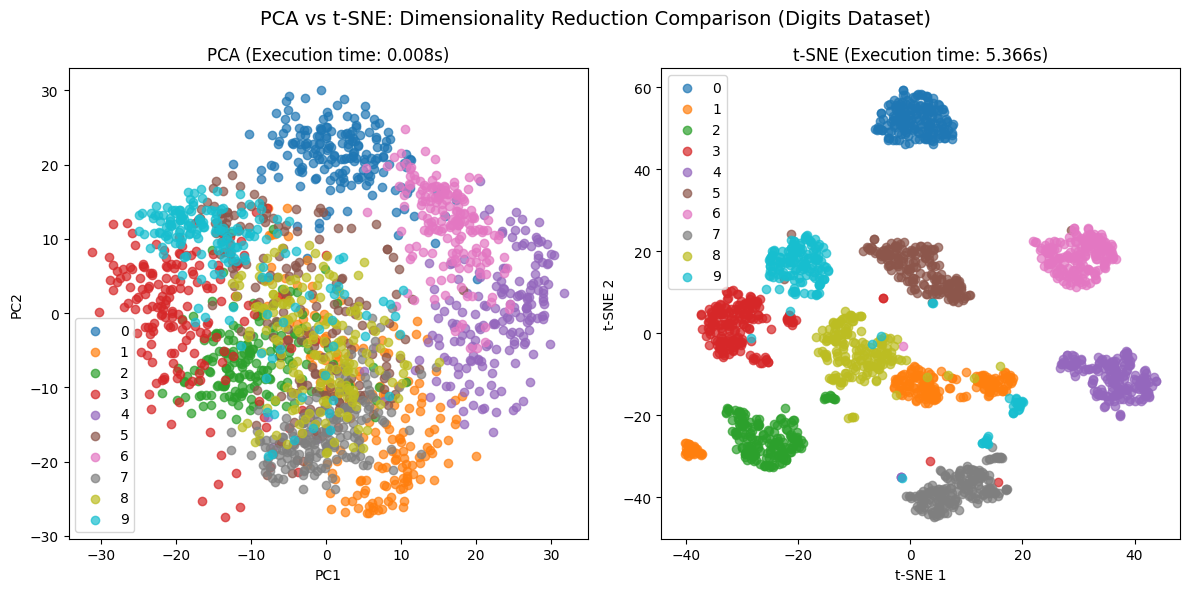

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import time

digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
start_tsne = time.time()
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=40)
X_tsne = tsne.fit_transform(X)
tsne_time = time.time() - start_tsne

start_pca = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_time = time.time() - start_pca

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# PCA subplot
for i in range(10):
    axes[0].scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.7, label = str(i))
axes[0].set_title(f'PCA (Execution time: {pca_time:.3f}s)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# t-SNE subplot
for i in range(10):
    axes[1].scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=0.7, label = str(i))
axes[1].set_title(f't-SNE (Execution time: {tsne_time:.3f}s)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].legend()

plt.suptitle('PCA vs t-SNE: Dimensionality Reduction Comparison (Digits Dataset)', fontsize=14)
plt.tight_layout()
plt.savefig("./figures/tSNE.png")
plt.show()
